# "Первые шаги"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/srt_data.csv')
df.head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
0,2018-10-01,VA4202760704,165132,2787.1310,1953.0737,575.49180
1,2018-10-02,VA4202760704,165132,2786.1047,1901.0000,550.63710
2,2018-10-03,VA4202760704,165132,2784.6934,1878.0369,550.09204
3,2018-10-04,VA4202760704,165132,2773.3500,1976.9114,583.65820
4,2018-10-05,VA4202760704,165132,2776.4314,2041.4010,589.74110


In [3]:
df.shape

(4824, 6)

In [4]:
print(f'df.ts.min() = {df.ts.min()}')
print(f'df.ts.max() = {df.ts.max()}')

df.ts.min() = 2018-10-01
df.ts.max() = 2019-04-30


In [5]:
df.isna().sum()

ts                         0
serialNo                   0
home                       0
batteryVoltageMilliV       3
insideTemperatureCentiC    2
humidityMilliPerc          0
dtype: int64

In [6]:
df.home.nunique()

8

In [7]:
df.home.unique()

array([165132, 174376,  29473, 234419, 193000, 213528, 251841, 300551])

In [8]:
df.serialNo.nunique()

25

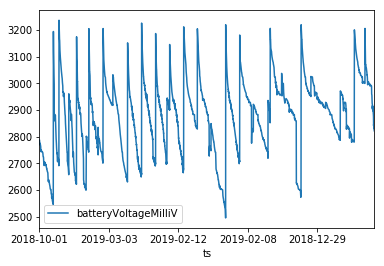

In [9]:
df.plot('ts', 'batteryVoltageMilliV')

In [10]:
df[df.batteryVoltageMilliV.isna()].head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
10,2018-10-11,VA4202760704,165132,NaN,2135.1000,657.02356
11,2018-10-12,VA4202760704,165132,NaN,2138.1677,676.12256
12,2018-10-13,VA4202760704,165132,NaN,2080.6738,653.83685


In [11]:
df[df.insideTemperatureCentiC.isna()].head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
23,2018-10-24,VA4202760704,165132,2750.4220,NaN,605.1256
24,2018-10-25,VA4202760704,165132,2750.6438,NaN,617.4750


# Задания

Выберите данные с датчика с серийным номером VA2170620672.

Укажите максимальное значение напряжения на батарее (batteryVoltageMilliV).

In [15]:
ser = df.query('serialNo == "VA2170620672"')['batteryVoltageMilliV']
ser.max()

3219.567

Для того же датчика укажите значение напряжения на батарее, соответствующее 75% квантиля распределения.

In [16]:
max_value = ser.max()
min_value = ser.min()
perc25 = ser.quantile(0.25)
perc75 = ser.quantile(0.75)
IQR = perc75 - perc25

print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {},'.format(perc25, perc75, IQR))
print(f'Границы значений: [{min_value}, {max_value}],')

25-й перцентиль: 2780.89985, 75-й перцентиль: 2951.2801, IQR: 170.38025000000016,
Границы значений: [2698.5662, 3219.567],


Для того же датчика выберите данные за ноябрь 2018 г. и укажите медианное значение на влажности (humidityMilliPerc).

In [20]:
# приведем формата даты к стандарту datetime
df.loc[:, 'ts'] = pd.to_datetime(df['ts'], format = '%Y-%m-%d')

In [27]:
ser = df.query('serialNo == "VA2170620672" and ts.dt.month == 11 and ts.dt.year == 2018')['humidityMilliPerc']
ser.median()

566.3562

Выберите данные с датчика с серийным номером VA2048854528.

Постройте график напряжения на батарее (batteryVoltageMilliV).

Укажите, сколько раз батарея была заменена (количество пиков со значением выше 3200 mV).

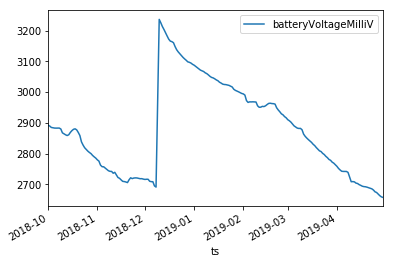

In [31]:
df.query('serialNo == "VA2048854528"').plot(x='ts', y='batteryVoltageMilliV')

Укажите, сколько значений температуры (среди всех данных) лежат строго ниже 1200 сС (12 градусов Цельсия).

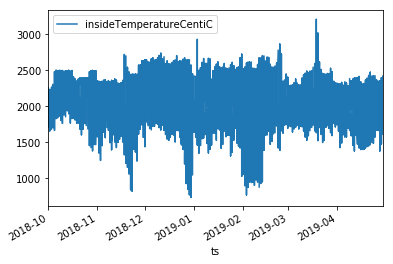

In [34]:
df.plot(x='ts', y='insideTemperatureCentiC')

In [36]:
(df['insideTemperatureCentiC'] < 1200).sum()

92

Укажите, сколько значений температуры (среди всех данных) лежат нестрого выше 75%-квантиля, вычисленного по всем датчикам.

In [38]:
perc75 = df['insideTemperatureCentiC'].quantile(0.75)
(df['insideTemperatureCentiC'] >= perc75).sum()

1206